In [1]:
import cv2
import caer
import os
import numpy as np
import matplotlib.pyplot as plt

**Image Basics Processing**

**__FOR THE WORK WITH IMAGES, TRANSFORMATIONS AND SUBSAMPLING  IT WOULD BE USED CV2, FOR LOADING IMAGES, THIS LIBRARY LOADS IN COLOR SPACE BGR, SO ITS NEEDED TO CHANGE IT FOR PLOTTING__**

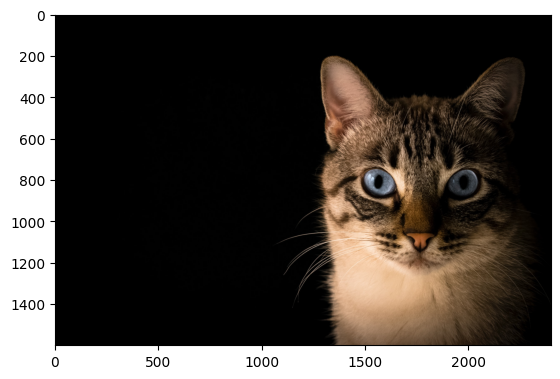

In [2]:
image = cv2.imread("./Resources/Photos/cat_large.jpg")
image1 = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image1)

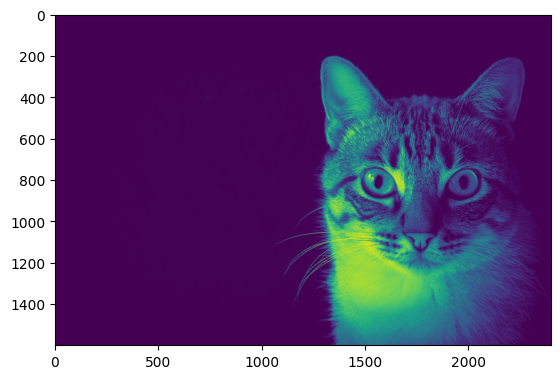

In [3]:
imageg = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(imageg)

In [4]:
type(image),image.shape,image.mean()

(numpy.ndarray, (1600, 2400, 3), np.float64(25.630135677083334))

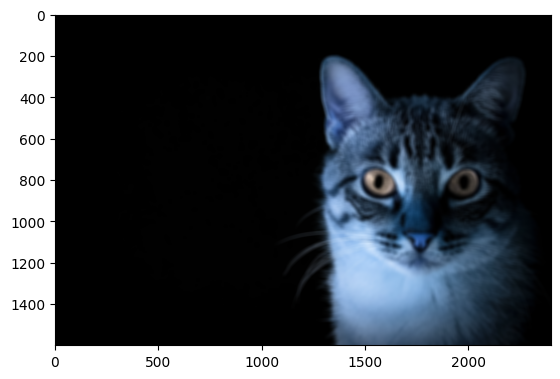

In [5]:
blur = cv2.blur(image,(20,20))
plt.imshow(blur)

Fast way to crop a image, it's manipulating the shape, since a image can be represented in a 3D space W,L,C , where W = width, L = lenght and C = chanel colors (usually when we work with a big amount of images, a new dimention comes up to agroup all them the B, that represents the batch size,  so  B,W,L,C)

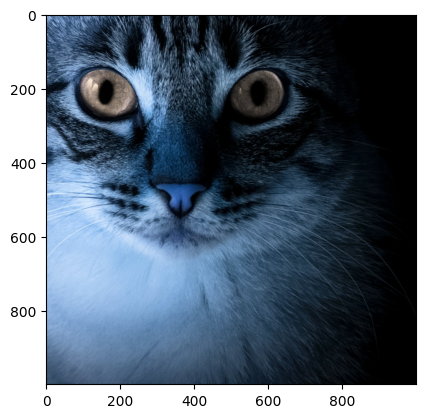

In [6]:
plt.imshow(image[-1000:,-1000:])

The fastest way to load all paths of the images  its taken the directory and make iterationgs trought itself getting all the files inside, for this process library os is used

In [7]:
PATH = "Resources/Photos"

if os.path.exists(PATH):
    photos = [os.path.relpath(f"Resources/Photos/{pi}") for pi in os.listdir("Resources/Photos")]

**TRANSFORMATIONS**

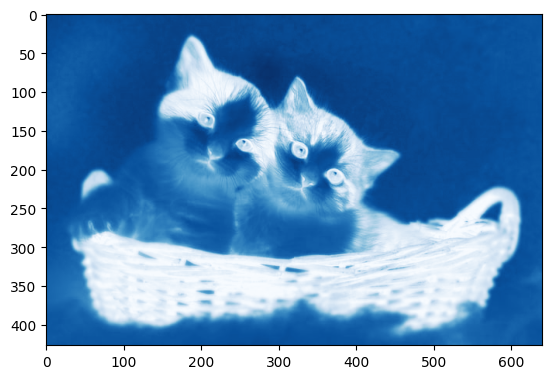

In [8]:
b,g,r = cv2.split((cv2.imread(photos[1])))
plt.imshow(b,cmap="Blues") # for each color cmap changes each Reads,Greens,Blues,Grays,.....

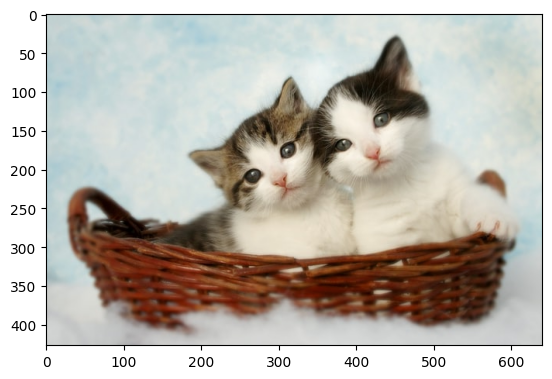

In [9]:
reverse = (cv2.imread(photos[1]))[:,::-1,::-1]
plt.imshow(reverse)

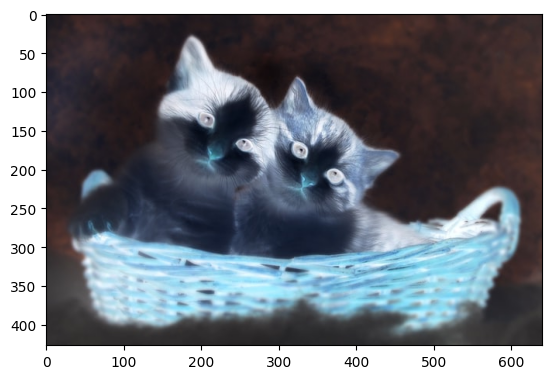

In [10]:
additiveInverse = 255 - cv2.cvtColor((cv2.imread(photos[1])),cv2.COLOR_BGR2RGB)
plt.imshow(additiveInverse)

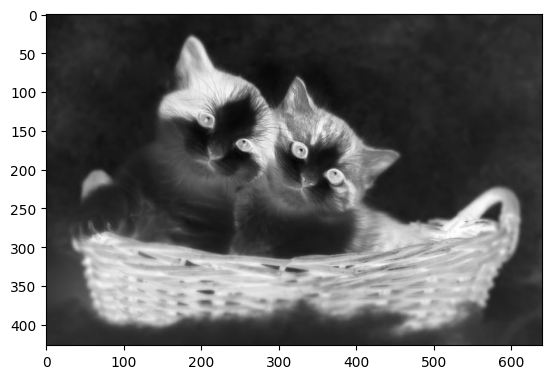

In [11]:
coloroff = 255 - cv2.cvtColor((cv2.imread(photos[1])),cv2.COLOR_BGR2GRAY)
plt.imshow(coloroff,cmap="gray")

**Kernel Implementation**

In [12]:
def reduction_grid(size_grid,image):
    resized_image = np.zeros(shape= (image.shape[0]//size_grid, image.shape[1]//size_grid))
    print(resized_image.shape)
    for i_y in range(0,resized_image.shape[0],1):
        for i_x in range(0,resized_image.shape[1],1):
            pos_x = i_x * size_grid + 1
            pos_y = i_y * size_grid + 1
            resized_image[i_y,i_x] = image[pos_y:pos_y+size_grid,pos_x:pos_x+size_grid].mean()
    return resized_image
        

(35, 53)
(35, 53)


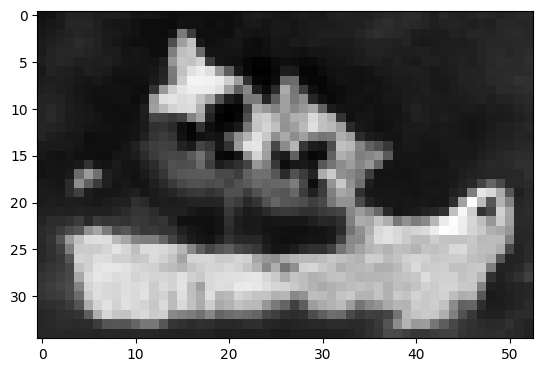

In [13]:
resized = reduction_grid(12,coloroff)
plt.imshow(reduction_grid(12,coloroff),cmap="gray")

In [ ]:
def gausian_kernel_aplication(size_grid,image):
    new_image = np.zeros(shape= (image.shape[0], image.shape[1]))
    # aproximation of the ND density function in a 3D space
    kernel = np.array([[1,2,1],[2,4,2],[1,2,1]])
    kernel = kernel* 1/16
    print(kernel.shape)
    for i_y in range(0,new_image.shape[0]-size_grid+1,size_grid):
        for i_x in range(0,new_image.shape[1]-size_grid+1,size_grid):
            pos_x = i_x 
            pos_y = i_y 
            new_image[pos_y:pos_y+size_grid,pos_x:pos_x+size_grid] = image[pos_y:pos_y+size_grid,pos_x:pos_x+size_grid] * kernel
    return new_image
        

(3, 3)


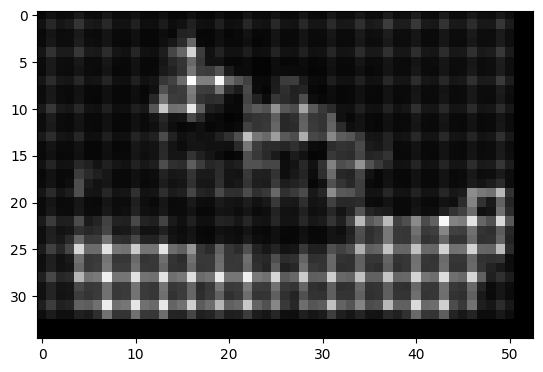

In [15]:
gray = cv2.cvtColor((cv2.imread(photos[1])),cv2.COLOR_BGR2GRAY)
plt.imshow(gausian_kernel_aplication(3,resized),cmap="gray")

A analitically way to detect edges of objects in a image, it's implementing a kernel (depends if we want to detect vertically or horizontally edges)

In [ ]:
def edges_detection(size_grid,image):
    new_image = np.zeros(shape= (image.shape[0], image.shape[1]))
    # aproximation of the ND density funtion in a espace 3D 
    kernel = np.array([[-1,0,1],[-1,0,1],[-1,0,1]]) # kernel for vertically edge detection
    # kernel =  np.array([[-1,0,1],[-1,0,1],[-1,0,1]]).flip(axis=1).T
    kernel = kernel* 1/9
    print(kernel.shape)
    for i_y in range(0,new_image.shape[0]-size_grid+1,size_grid):
        for i_x in range(0,new_image.shape[1]-size_grid+1,size_grid):
            pos_x = i_x 
            pos_y = i_y 
            new_image[pos_y:pos_y+size_grid,pos_x:pos_x+size_grid] = image[pos_y:pos_y+size_grid,pos_x:pos_x+size_grid] * kernel
    return new_image
        

(3, 3)


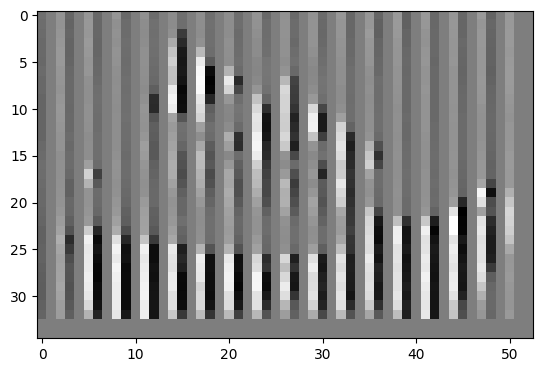

In [17]:
plt.imshow(edges_detection(3,resized),cmap="gray")

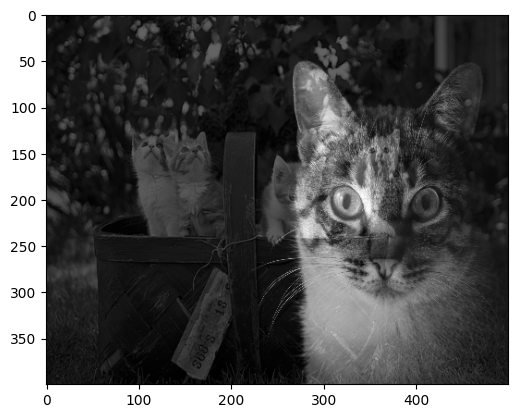

In [18]:
def refact_image(image,value):
    return np.uint8(np.clip(image * value,0,255))
def adding(image1,image2,alpha):
    return refact_image(image1,alpha) + refact_image(image2,1-alpha)
size = 500,400
img1 = cv2.cvtColor(cv2.imread(photos[2]),cv2.COLOR_BGR2GRAY)
img1 = cv2.resize(img1,size)
img2 = cv2.cvtColor(cv2.imread(photos[3]),cv2.COLOR_BGR2GRAY)
img2 = cv2.resize(img2,size)
plt.imshow(adding(img1,img2,0.35),cmap='gray')    

**ADDING NOISE**

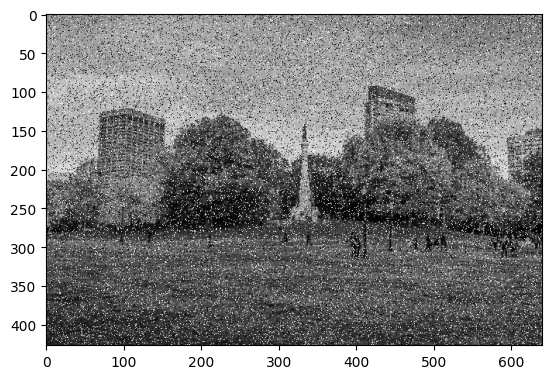

In [19]:
def salt_and_pepper(image,alpha):
    rnd  =  np.random.rand(*image.shape)
    noisy  = image.copy() if image.max() <= 1 else image.copy()/255.
    noisy[rnd < alpha] = 1
    noisy[rnd > 1-alpha] = 0
    return np.uint8(noisy*255)
sap_image = cv2.imread(photos[7])
sap_image = cv2.cvtColor(sap_image, cv2.COLOR_BGR2GRAY)
plt.imshow(salt_and_pepper(sap_image,0.07),cmap="gray")

**BASIC SEGMENTATION**
- Implementing global treshold.
- Adaptive  threshold.
- Multilevel threshold.

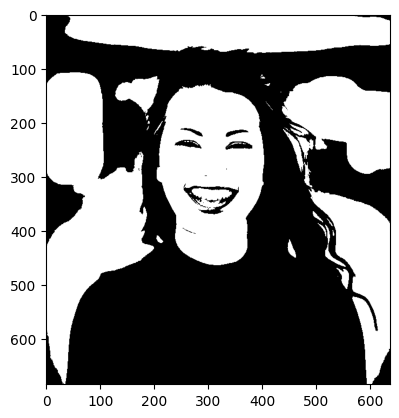

In [20]:
image_  = cv2.imread(photos[6])
image_ = cv2.cvtColor(image_, cv2.COLOR_BGR2GRAY)
# try to use Otsu's method
gthreshold  =  image_.mean()
image_[image_> gthreshold] = 255
image_[image_<= gthreshold] = 0
plt.imshow(image_,cmap="gray")

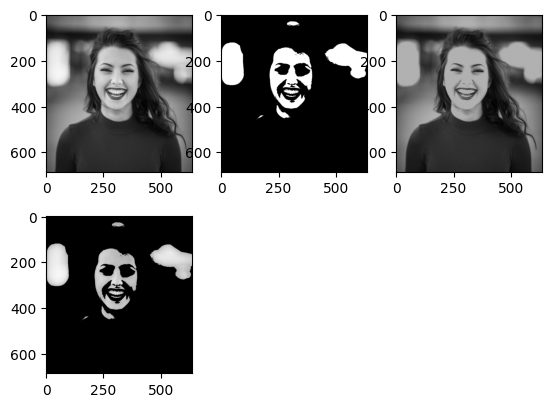

In [21]:
# with cv2 

image_  = cv2.imread(photos[6])
image_ = cv2.cvtColor(image_, cv2.COLOR_BGR2GRAY)

ret,treshold1 = cv2.threshold(image_,177,255, cv2.THRESH_BINARY)
ret,treshold2 = cv2.threshold(image_,177,255, cv2.THRESH_TRUNC)
ret,treshold3 = cv2.threshold(image_,177,255, cv2.THRESH_TOZERO)

images = [image_,treshold1,treshold2,treshold3]

for i in range(len(images)):
    plt.subplot(2,3,i+1),plt.imshow(images[i],cmap="gray",vmin=0,vmax=255)

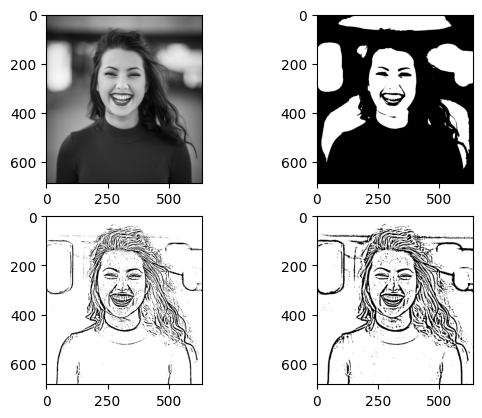

In [22]:
#adaptive cv2
ret,threshold  = cv2.threshold(image_,120,255,cv2.THRESH_BINARY)
thresholdAdaptive1 = cv2.adaptiveThreshold(image_,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
thresholdAdaptive2 = cv2.adaptiveThreshold(image_,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

images = [image_,threshold,thresholdAdaptive1,thresholdAdaptive2]

for i in range(len(images)):
    plt.subplot(2,2,i+1),plt.imshow(images[i],cmap="gray",vmax=255,vmin=0)

**Frecuency Space** _Fourier Space_

There are many ways to represent a image, one of them is frecuency representation where you threat each row or column of the image like a individual signal in a frecuency space.

In [37]:
def plot_frecuency(images,row = 0):
    rows = len(images)
    for i in range(rows):
        y = images[i][row,:]
        x = np.arange(len(y))
        plt.subplot(rows,2,i+1),plt.plot(x,y)

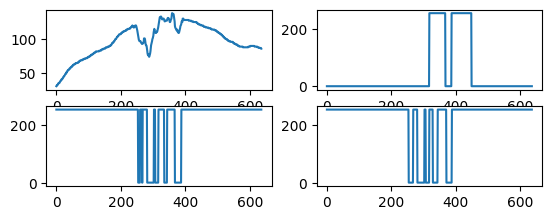

In [40]:
plot_frecuency(images,61)

The historigrams above can be used to determinete a edge in the image looking at the cliffs produced by the signal.